# Data Preprocessing Assignment


In [23]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

# tried using cmapPy for GCT file actions
#from cmapPy.pandasGEXpress.parse import parse


## Part 1

In [24]:
"""
    Reads a GenePattern GCT file into a Pandas DataFrame.
    Parameters:
        filepath (str): Path to the GCT file.
        summary (bool): If True, prints the number of rows and columns imported.
    Returns:
        pd.DataFrame: DataFrame containing the GCT file data.
"""
def read_gct(filepath, summary=False):
    
    # open GCT file, using the given filepath skipping 2 rows
    df = pd.read_csv(filepath, sep='\t', skiprows=2)

    # Set the first two columns as indexes
    df.set_index(['Name', 'Description'], inplace=True)

    # Print summary if the parameter is True
    if summary:
        print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

    return df

## Part 2
Opening the given files and testing read_gct

In [25]:
file_2a = "/Users/garvit/Desktop/test/BRCA_minimal_60x19.gct"
df_2a = read_gct(file_2a, summary=True)

Number of rows: 60, Number of columns: 19


In [26]:
# Confirming the dataframe contains right data
df_2a.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60 entries, ('COL1A1', 'NCBI Gene ID: 1277') to ('TIMP3', 'NCBI Gene ID: 7078')
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A7-A0CE-Normal  60 non-null     float64
 1   A7-A0CH-Normal  60 non-null     float64
 2   A7-A0D9-Normal  60 non-null     float64
 3   A7-A0DB-Normal  60 non-null     float64
 4   A7-A13E-Normal  60 non-null     float64
 5   A7-A13F-Normal  60 non-null     float64
 6   A7-A13G-Normal  60 non-null     float64
 7   AC-A23H-Normal  60 non-null     float64
 8   AC-A2FB-Normal  60 non-null     float64
 9   AC-A2FF-Normal  60 non-null     float64
 10  3C-AAAU-Tumor   60 non-null     float64
 11  3C-AALI-Tumor   60 non-null     float64
 12  3C-AALJ-Tumor   60 non-null     float64
 13  3C-AALK-Tumor   60 non-null     float64
 14  4H-AAAK-Tumor   60 non-null     float64
 15  5L-AAT0-Tumor   60 non-null     float64
 16  5L-AAT1-Tumor   60 non

In [27]:
file_2b = "/Users/garvit/Desktop/test/BRCA_large_20783x40.gct"
df_2b = read_gct(file_2b)

In [28]:
# Confirming the dataframe contains right data
#df_2b.head()
df_2b.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20783 entries, ('TSPAN6', 'tetraspanin 6') to ('LINC01144', 'long intergenic non-protein coding RNA 1144')
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A7-A0CE-normal   20783 non-null  float64
 1   A7-A0CH-normal   20783 non-null  float64
 2   A7-A0D9-normal   20783 non-null  float64
 3   A7-A0DB-normal   20783 non-null  float64
 4   A7-A13E-normal   20783 non-null  float64
 5   A7-A13F-normal   20783 non-null  float64
 6   A7-A13G-normal   20783 non-null  float64
 7   AC-A23H-normal   20783 non-null  float64
 8   AC-A2FB-normal   20783 non-null  float64
 9   AC-A2FF-normal   20783 non-null  float64
 10  AC-A2FM-normal   20783 non-null  float64
 11  BH-A0AU-normal   20783 non-null  float64
 12  BH-A0AY-normal   20783 non-null  float64
 13  BH-A0AZ-normal   20783 non-null  float64
 14  BH-A0B3-normal   20783 non-null  float64
 15  BH-A0B5-normal   20783 

## Part 3
Plotting histigrams using matplotlib

In [29]:
# selecting the colums to work on
columns = ['A7-A0DB-normal', 'A7-A13E-normal', 'BH-A0B3-primary', 'BH-A0B5-primary']

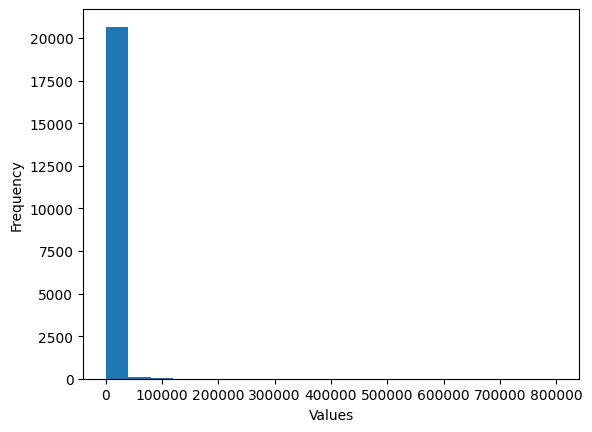

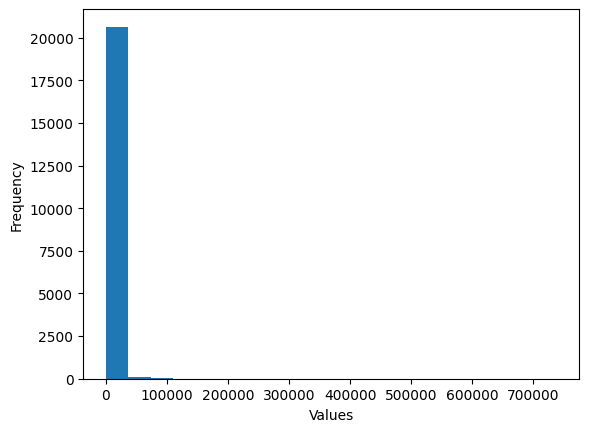

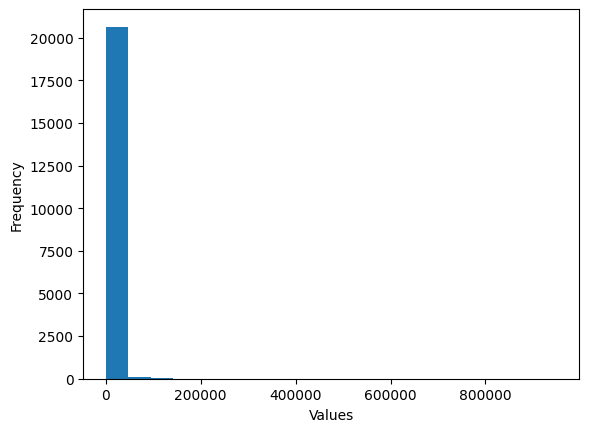

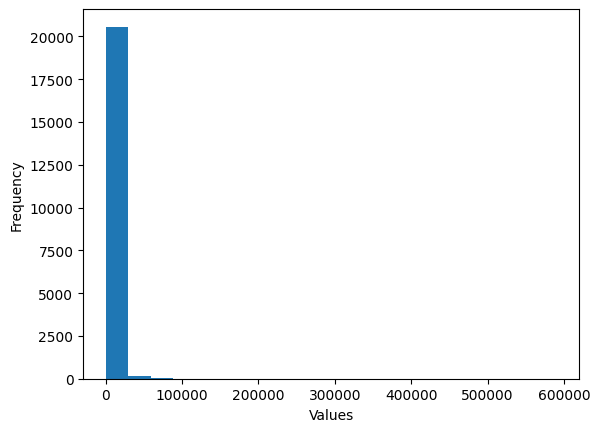

In [30]:
# for each column selected, plot a histogram
for col in columns:
    plt.hist(df_2b[col], bins=20) # create histogram, containing 20 bins
    plt.xlabel('Values')          # x-axis label
    plt.ylabel('Frequency')       # y-axis lavbel
    plt.show()

## Part 4
For each column report the mean, median, and standard deviation

In [31]:
# create the dataframe containing relevant statistics
statistics = pd.DataFrame({
    'Sample Name' : df_2b.columns,
    'Mean' : df_2b.mean(),
    'Median' : df_2b.median(),
    'Standard Deviation' : df_2b.std()
})

In [32]:
# print the first few rows of the dataframe
print(statistics.head())

                   Sample Name         Mean  Median  Standard Deviation
A7-A0CE-normal  A7-A0CE-normal  3308.877255   814.0        12725.531516
A7-A0CH-normal  A7-A0CH-normal  3046.316942   630.0        14145.451194
A7-A0D9-normal  A7-A0D9-normal  2628.131550   350.0        17827.391513
A7-A0DB-normal  A7-A0DB-normal  2354.674445   362.0        13973.914409
A7-A13E-normal  A7-A13E-normal  2380.702593   427.0        13373.496798


## Part 5
Filter the data to remove rows with max value < 1000

In [33]:
# 5a
# applying the filter
filtered_df = df_2b[df_2b.max(axis=1) >= 1000]

In [34]:
# verifying the format of the dataframe
filtered_df.head()

,,A7-A0CE-normal,A7-A0CH-normal,A7-A0D9-normal,A7-A0DB-normal,A7-A13E-normal,A7-A13F-normal,A7-A13G-normal,AC-A23H-normal,AC-A2FB-normal,AC-A2FF-normal,...,AC-A2FM-primary,BH-A0AU-primary,BH-A0AY-primary,BH-A0AZ-primary,BH-A0B3-primary,BH-A0B5-primary,BH-A0B7-primary,BH-A0B8-primary,BH-A0BA-primary,BH-A0BC-primary
Name,Description,,,,,,,,,,,,,,,,,,,,,
TSPAN6,tetraspanin 6,5404.0,5030.0,3616.0,2425.0,3400.0,3276.0,4611.0,7362.0,5389.0,4686.0,...,453.0,1390.0,2418.0,1946.0,2498.0,2709.0,3701.0,2390.0,6725.0,1173.0
TNMD,tenomodulin,320.0,2116.0,3616.0,304.0,992.0,2159.0,869.0,234.0,1218.0,103.0,...,74.0,50.0,62.0,54.0,20.0,20.0,88.0,38.0,113.0,92.0
DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic",2472.0,1611.0,1254.0,1137.0,1242.0,1295.0,1896.0,1813.0,1930.0,2143.0,...,2381.0,2143.0,1675.0,1235.0,1853.0,1739.0,2172.0,1391.0,3203.0,1709.0
SCYL3,SCY1 like pseudokinase 3,1483.0,1154.0,820.0,687.0,931.0,1178.0,1262.0,1684.0,1589.0,1829.0,...,1759.0,1676.0,1460.0,1705.0,1168.0,3469.0,2544.0,1274.0,4205.0,1687.0
C1orf112,chromosome 1 open reading frame 112,312.0,252.0,225.0,241.0,259.0,277.0,256.0,390.0,331.0,524.0,...,629.0,618.0,406.0,354.0,1166.0,2086.0,325.0,462.0,2162.0,1015.0


In [35]:
# 5b 
# Reporting the mean, median, and standard deviation of the filtered dataset

statistics_post_filter = pd.DataFrame({
    'Sample Name' : filtered_df.columns,
    'Mean' : filtered_df.mean(),
    'Median' : filtered_df.median(),
    'Standard Deviation' : filtered_df.std()
})

In [36]:
print(statistics_post_filter.head())

                   Sample Name         Mean  Median  Standard Deviation
A7-A0CE-normal  A7-A0CE-normal  5058.274447  2130.0        15556.522485
A7-A0CH-normal  A7-A0CH-normal  4665.274373  1720.0        17387.078299
A7-A0D9-normal  A7-A0D9-normal  4030.654502  1150.0        22054.057242
A7-A0DB-normal  A7-A0DB-normal  3608.259552  1150.0        17257.234494
A7-A13E-normal  A7-A13E-normal  3647.490728  1252.0        16501.582134


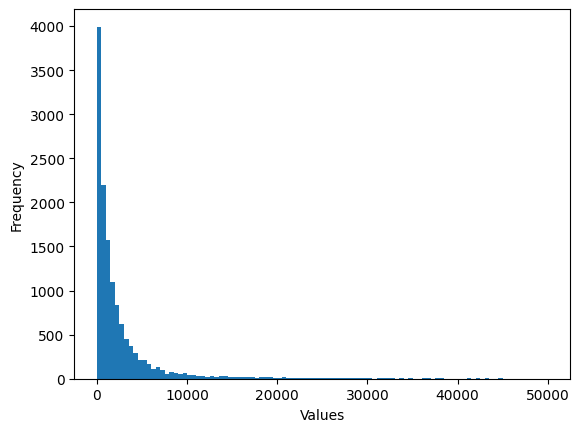

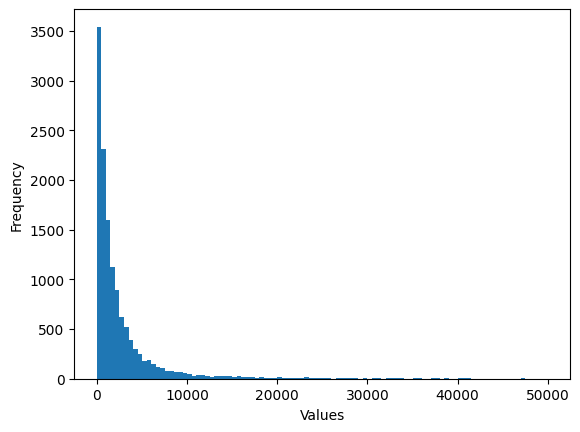

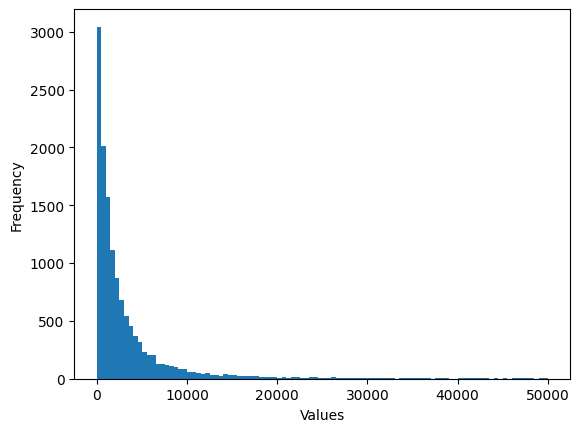

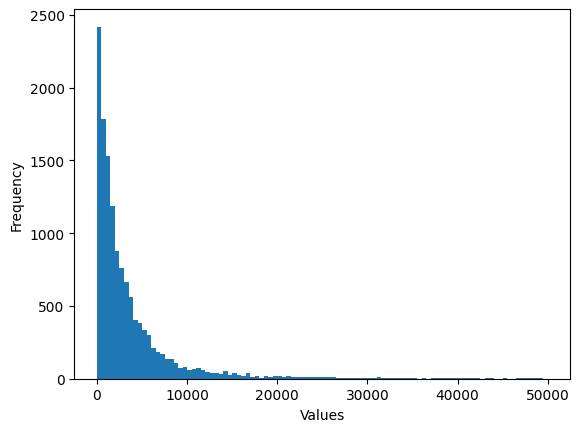

In [37]:
# plotting a histogram for the same colums as part 3, restricting the range to [0,50000] to improve clarity

for col in columns:
    plt.hist(filtered_df[col], bins=100, range=[0,50000]) # creating histogram
    plt.xlabel('Values')                                 # x-axis label
    plt.ylabel('Frequency')                              # y-axis label
    plt.show()